In [166]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
from gtda.diagrams import PersistenceEntropy

## Circumference data

In [126]:
n= 100
x= []
y= []
for t in np.linspace(0,2*math.pi,n):
    x.append(math.cos(t))
    y.append(math.sin(t))
x= np.array(x)
y= np.array(y)

In [133]:
data=np.transpose(np.stack((x,y)))

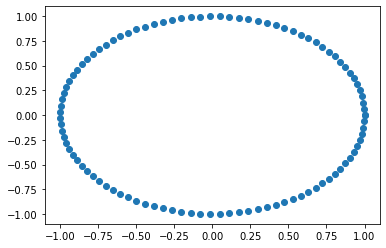

In [136]:
plt.plot(data[:,0],data[:,1],'o')

## Circumference with noise data

In [137]:
noise = np.random.normal(0,0.1,n)

In [138]:
x_noise=x+noise
y_noise = y+noise
data_noise = np.transpose(np.stack((x_noise,y_noise)))

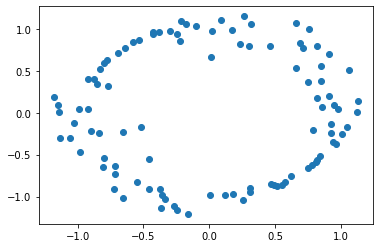

In [141]:
plt.plot(data_noise[:,0],data_noise[:,1],'o')

## Two circumferences

In [158]:
data_2_circ = np.concatenate((np.transpose(np.stack((x,y+4))),data))

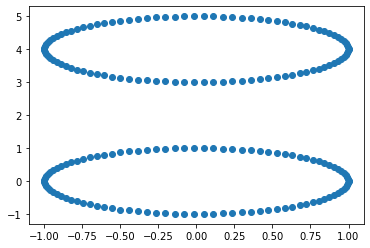

In [159]:
plt.plot(data_2_circ[:,0],data_2_circ[:,1],'o')

## Persistence diagrams and persistent entropy computation

In [160]:
homology_dimensions=[0,1]
persistence = VietorisRipsPersistence(
                metric = "euclidean",
                homology_dimensions=homology_dimensions)

In [161]:
diagrams=persistence.fit_transform([data,data_noise,data_2_circ])

In [162]:
plot_diagram(diagrams[0])

In [163]:
plot_diagram(diagrams[1])

In [165]:
plot_diagram(diagrams[2])

In [178]:
PE = PersistenceEntropy(normalize=False)
features = PE.fit_transform(diagrams)

In [186]:
features

array([[6.61470984, 0.        ],
       [6.44828045, 0.91937891],
       [7.14014741, 1.        ]])